<a href="https://colab.research.google.com/github/pranshu-raj-211/project-alphazero/blob/main/explore_architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist


In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255

11490434/11490434 [==============================] - 0s 0us/step


Making a basic Convnet

In [13]:
from keras import layers

inputs=keras.Input(shape=(28,28,1))
x= layers.Conv2D(filters=32,kernel_size=3,activation='relu',)(inputs)
x=layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=64,kernel_size=3,activation='relu',)(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=128,kernel_size=3,activation='relu',)(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='softmax')(x)

model=keras.Model(inputs=inputs,outputs=outputs)

model_1=keras.Model(inputs=inputs,outputs=outputs)

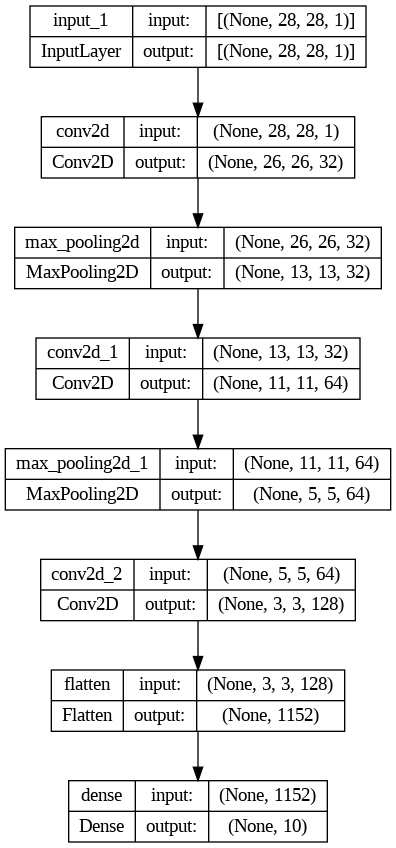

In [7]:
keras.utils.plot_model(model,'basic_cnn.png',show_shapes=True)

In [8]:
model.compile(optimizer='rmsprop',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 33s 34ms/step - loss: 0.1596 - accuracy: 0.9501
Epoch 2/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0457 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0313 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0193 - accuracy: 0.9941


In [10]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print(test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0237 - accuracy: 0.9925
0.9925000071525574


The next cell is executing incorrectly, it's trying to train an already trained model whcih gives me a very high accuracy from the get go, I'll need to rectify this error and try again for another model

In [14]:
model_1.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model_1.fit(train_images,train_labels,epochs=5,batch_size=64,validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 23s 34ms/step - loss: 0.2217 - accuracy: 0.9324 - val_loss: 0.0701 - val_accuracy: 0.9787
Epoch 2/5
657/657 [==============================] - 22s 34ms/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.0548 - val_accuracy: 0.9836
Epoch 3/5
657/657 [==============================] - 21s 33ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0512 - val_accuracy: 0.9853
Epoch 4/5
657/657 [==============================] - 22s 34ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.0483 - val_accuracy: 0.9847
Epoch 5/5
657/657 [==============================] - 22s 34ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.0384 - val_accuracy: 0.9888


In [15]:
test_loss,test_accuracy=model_1.evaluate(test_images,test_labels)
print(test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0276 - accuracy: 0.9909
0.9908999800682068


### More things to try with this -
Adding dropout, dropblock to prevent overfitting
Feature selection - there might be a better way to model features
Hyperparameter tuning for number of units in the convolution layers

### Using convnets on small datasets

Dogs vs cats dataset, can be used wit any other dataset, really
I'll also learn to use pretrained models and perform transfer learning

In [18]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# chmod 600 makes it readable to current user only

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [19]:
!kaggle competitions downloads -c dogs-vs-cats

usage: kaggle competitions [-h] {list,files,download,submit,submissions,leaderboard} ...
kaggle competitions: error: argument command: invalid choice: 'downloads' (choose from 'list', 'files', 'download', 'submit', 'submissions', 'leaderboard')


In [ ]:
!unzip -qq train.zip

I'll do this later, for now I'll continue with the other chapters, trying our RNNs and LSTMs

### Deep learning for time series

Finally, my favorite part
I'll be working on the Jena weather dataset, could do anything as long as it's not a random walk(ML and DL are'nt remotely useful in those scenarios).

In [20]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-01-10 14:03:48--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.61.176, 16.182.72.104, 52.216.63.16, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.61.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  18.8MB/s    in 0.7s    

2024-01-10 14:03:49 (18.8 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [23]:
import os

fname=os.path.join('jena_climate_2009_2016.csv')

with open(fname) as f:
    data=f.read()

lines=data.split('\n')
header=lines[0].split(',')
lines=lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [24]:
print(lines[0])

01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30


In [26]:
temperature=np.zeros((len(lines),))
raw_data=np.zeros((len(lines),len(header)-1))

for i,line in enumerate(lines):
    values=[float(x) for x in line.split(',')[1:]]     # It would seem that I'm not storing the timestamp
    temperature[i]=values[1]
    raw_data[i,:]=values[:]

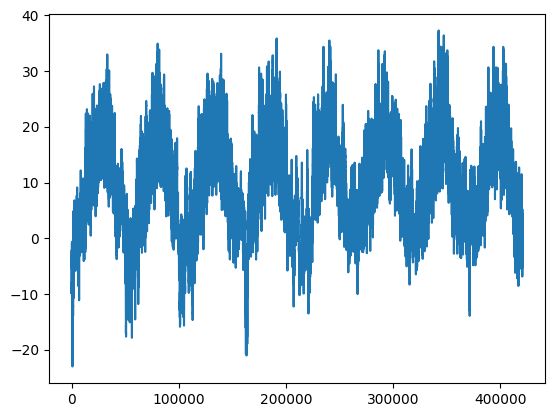

In [27]:
plt.plot(range(len(temperature)),temperature)

This plot shows the great thing about practicing timeseries on weather data - a clear trend (almost constant) and predictable seasonality over years.

More about the data - It is collected every 10 minutes so therefore we can show the daily temperature change with 144 values.

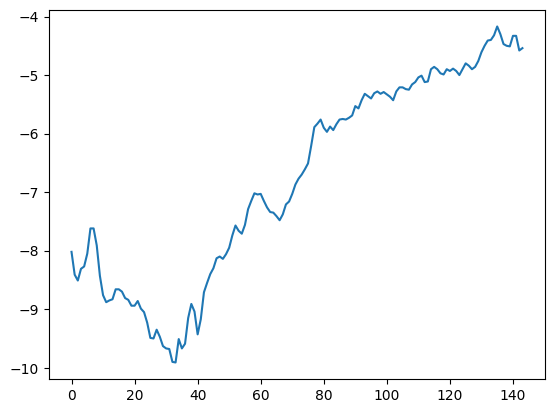

In [28]:
plt.plot(range(144),temperature[:144])      # temperature for one day, I don't know what times these correspond to

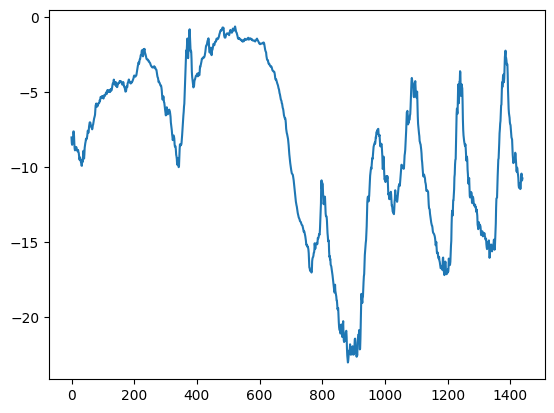

In [29]:
plt.plot(range(1440),temperature[:1440])

I just realized I could have made an interactive plot using plotly or bokeh which would have saved me some time

### The process of time series forecasting

The time series forecasting workflow is different from the conventional ML workflow where we split data (usually shuffled) for training, validation and testing. In time series we can't shuffle or that leads to data leakage as well as random trends getting picked up.

Instead we take a portion from the start to somewhere in the middle as a training set, create a validation split to improve generalization of the model and have a pretty good chunk of data at the end for monitoring before the model is put into production. More on this later.